# Task3 - Exploratory Data Analysis
### Name:Annabthina Harsha Vardhan chowdary
### objective :Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

In [3]:
df=pd.read_csv("C://Users//harib//Downloads//SampleSuperstore.csv")
df['Gross Profit']=((df['Profit']/df['Sales'])*100)

In [4]:

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Gross Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Gross Profit    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
Gross Profit    9994 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Gross Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,12.031393
std,32063.693350,623.245101,2.225110,0.206452,234.260108,46.675435
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,7.500000
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,27.000000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,36.250000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,50.000000


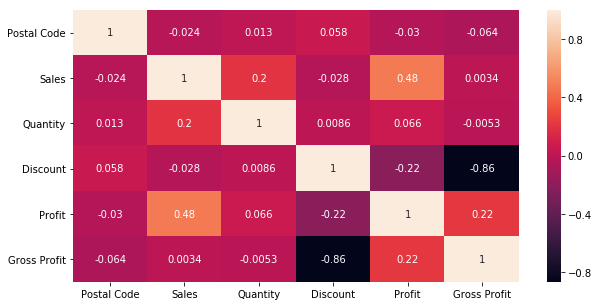

In [8]:
correlation=df.corr()
plt.figure(figsize=(10,5))
sea.heatmap(correlation,annot=True)

In [9]:
df2=df.drop(['Country','Postal Code','Quantity','Discount'],axis=1)
df2.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Profit,Gross Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,41.9136,16.00
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,219.5820,30.00
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,6.8714,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,-383.0310,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2.5164,11.25


Text(0.5,1,'Category -- Region wise')

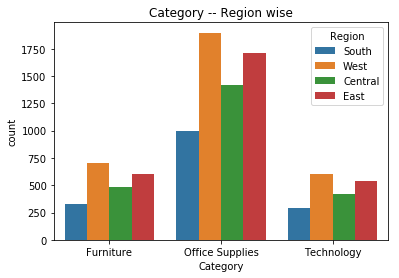

In [10]:

sea.countplot(x='Category',hue='Region',data=df2)
plt.title("Category -- Region wise")

Text(0.5,1,'Sub-Category -- Region wise')

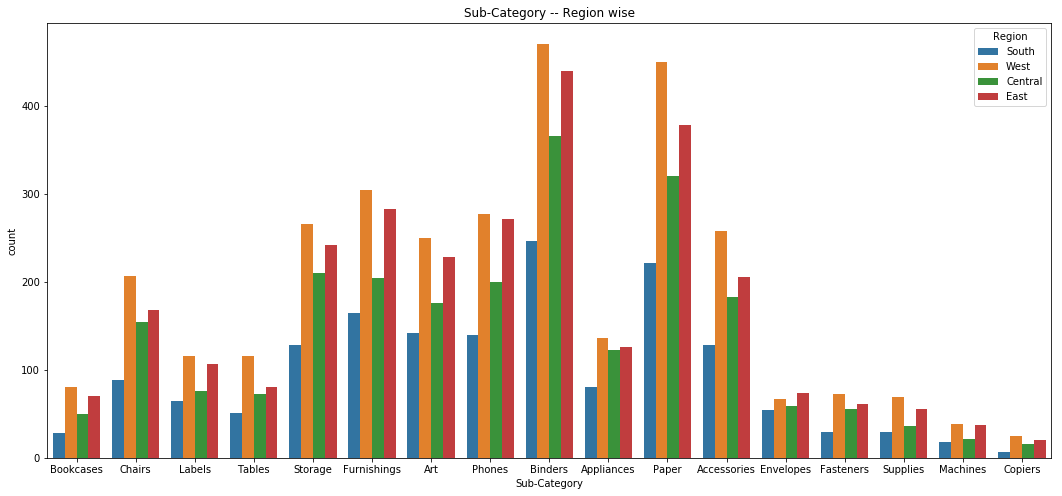

In [11]:
plt.figure(figsize=(18,8))
sea.countplot(x='Sub-Category',hue='Region',data=df2)
plt.title("Sub-Category -- Region wise")

Text(0.5,1,'Sales Vs Profits -- Segment wise')

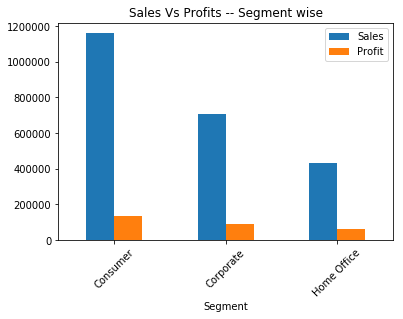

In [12]:
df2.groupby(['Segment']).sum()[['Sales','Profit']].plot.bar()
plt.xticks(rotation=45)
plt.title("Sales Vs Profits -- Segment wise")

Text(0.5,1,'Sales Vs Profits -- Ship Mode wise')

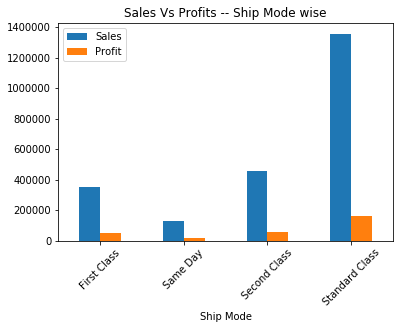

In [13]:

df2.groupby(['Ship Mode']).sum()[['Sales','Profit']].plot.bar()
plt.xticks(rotation=45)
plt.title("Sales Vs Profits -- Ship Mode wise")

Text(0.5,1,'Gross Profits -- State wise')

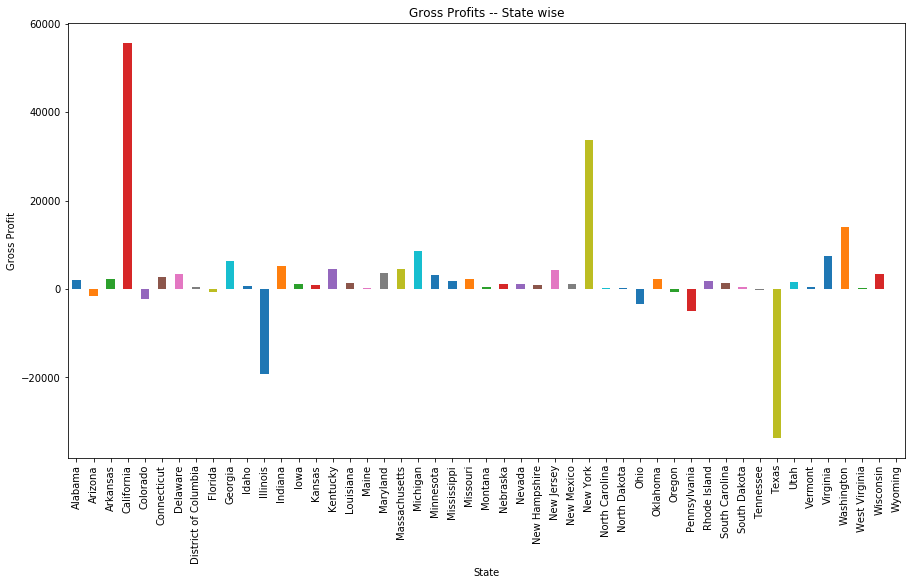

In [14]:
plt.figure(figsize=(15,8))
df2.groupby(['State']).sum()['Gross Profit'].plot.bar()
plt.xticks(rotation=90)
plt.ylabel("Gross Profit")
plt.title("Gross Profits -- State wise")

Text(0.5,1,'20 Cities with highest Gross Profits')

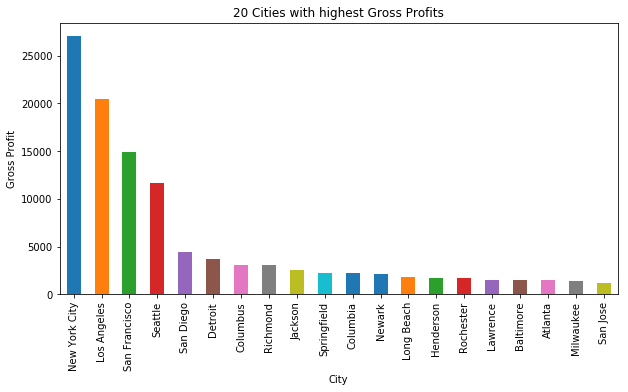

In [15]:
plt.figure(figsize=(10,5))
df2.groupby(['City']).sum()['Gross Profit'].sort_values(ascending=False).head(20).plot.bar()
plt.ylabel("Gross Profit")
plt.title("20 Cities with highest Gross Profits")